# Real Estate Valuation Modeling

Utitlizing supervised machine learning tools to predict house price on our data set.

# Intro to dataset

In [12]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)

# data (as pandas dataframes)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets

# variable information
print(real_estate_valuation.variables)

                                     name     role        type demographic  \
0                                      No       ID     Integer        None   
1                     X1 transaction date  Feature  Continuous        None   
2                            X2 house age  Feature  Continuous        None   
3  X3 distance to the nearest MRT station  Feature  Continuous        None   
4         X4 number of convenience stores  Feature     Integer        None   
5                             X5 latitude  Feature  Continuous        None   
6                            X6 longitude  Feature  Continuous        None   
7              Y house price of unit area   Target  Continuous        None   

                                         description  \
0                                               None   
1  for example, 2013.250=2013 March, 2013.500=201...   
2                                               None   
3                                               None   
4  number of conv

In [13]:
import pandas as pd
# Import pandas for concatenation
data = pd.concat([X, y], axis=1)

**Here is a description of the data in each column:**

* `X1`: transaction date

* `X2`: house age in years

* `X3`: distance to the nearest MRT station in meters

* `X4`: number of convenience stores in the living circle on foot

* `X5`: geographic coordinate, latitude

* `X6`: geographic coordinate, longitude

* `Y`: house price of unit area in 10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared - **our target**

There are no missing values in our dataset.


In [14]:
# Find the range of transaction dates
min_date = data['X1 transaction date'].min()
max_date = data['X1 transaction date'].max()

print(f"The range of transaction dates is from {min_date} to {max_date}")

The range of transaction dates is from 2012.667 to 2013.583


In [15]:
#Find range of Y

min_price = data['Y house price of unit area'].min()
max_price = data['Y house price of unit area'].max()

print(f"The range of house prices is from {min_price} to {max_price}")

The range of house prices is from 7.6 to 117.5


In [16]:
display(data)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


# Data cleaning and preprocessing

In [17]:
import pandas as pd

# Assuming 'data' DataFrame is already defined from the previous code

new_column_names = {}
for col in data.columns:
  new_name = col.split()[0]  # Extract the first word
  new_column_names[col] = new_name

data = data.rename(columns=new_column_names)

print(data.head())

         X1    X2         X3  X4        X5         X6     Y
0  2012.917  32.0   84.87882  10  24.98298  121.54024  37.9
1  2012.917  19.5  306.59470   9  24.98034  121.53951  42.2
2  2013.583  13.3  561.98450   5  24.98746  121.54391  47.3
3  2013.500  13.3  561.98450   5  24.98746  121.54391  54.8
4  2012.833   5.0  390.56840   5  24.97937  121.54245  43.1


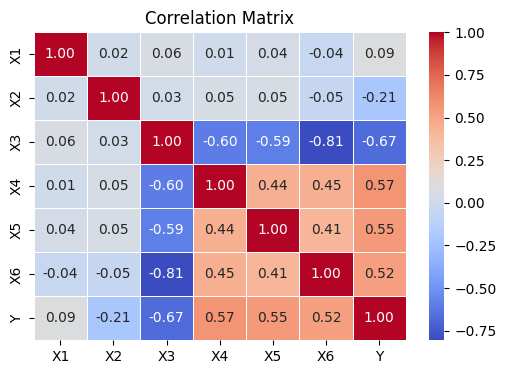

In [18]:
# Heatmap of correlations

import matplotlib.pyplot as plt
import seaborn as sns
# Compute correlation matrix
correlation_matrix = data.corr()


plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

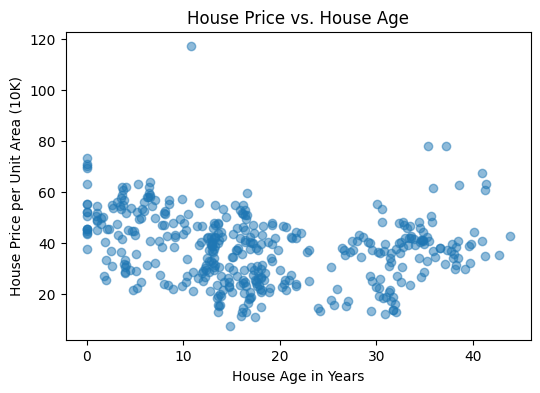

In [19]:
#Scatter plot

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(data['X2'], data['Y'], alpha=0.5)
plt.xlabel('House Age in Years')
plt.ylabel('House Price per Unit Area (10K)')
_ = plt.title('House Price vs. House Age')

<ipython-input-20-df8f30479492>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['high_priced'] = location_data['Y'] >= threshold


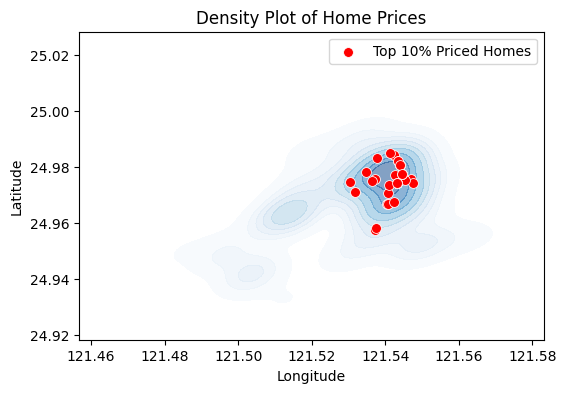

In [20]:
# Create density plot for all homes

location_data = data[['X5', 'X6', 'Y']]

# Check the top 10% of highest-priced homes
threshold = location_data['Y'].quantile(0.9)  # Top 10% threshold
location_data['high_priced'] = location_data['Y'] >= threshold
high_priced = location_data[location_data['high_priced']]

plt.figure(figsize=(6, 4))


sns.kdeplot(
    x=location_data['X6'],
    y=location_data['X5'],
    cmap='Blues', fill=True, alpha=0.5, label='All Homes'
)

# Overlay high-priced homes
sns.scatterplot(
    x=high_priced['X6'],
    y=high_priced['X5'],
    color='red', s=50, label='Top 10% Priced Homes'
)

plt.title('Density Plot of Home Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Splitting the data

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Y'])
y = data['Y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Tree-based models

## 1. Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
score = rf_model.score(X_train, y_train)
print( "Training score: ", score)

print(f"Random Forest RMSE: {rmse}")
print(f"Random Forest R²: {r2}")

Training score:  0.9497798073068936
Random Forest RMSE: 5.693072342983686
Random Forest R²: 0.8068006553352045


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [23]:
#optimize model parameters for random forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_root_mean_squared_error')

In [24]:
from sklearn.model_selection import cross_val_score
import numpy as np


# Best parameters and model
best_model_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
y_pred_rf = best_model_rf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
r2 = r2_score(y_test, y_pred_rf)
score = best_model_rf.score(X_train, y_train)
print("Training score: ", score)
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

cv_scores = cross_val_score(best_model_rf, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-Validation RMSE Scores:", -cv_scores)
print("Mean RMSE:", -np.mean(cv_scores))

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Training score:  0.8794812466852981
RMSE: 5.3123017062529625
R²: 0.8317799690327274


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Cross-Validation RMSE Scores: [ 5.59532272  7.09881811  6.03934474 10.3810362   5.77090642]
Mean RMSE: 6.977085638152159


## 2. XGB Regressor

In [25]:
from xgboost import XGBRegressor

# Train the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
score = xgb_model.score(X_train, y_train)
print( "Training score: ", score)

print(f"XGBoost RMSE: {rmse}")
print(f"XGBoost R²: {r2}")

Training score:  0.9120694194877625
XGBoost RMSE: 5.8947057277519415
XGBoost R²: 0.7928731012546499


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
#optimize model parameters for xgb

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [75, 100, 125],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [2, 3, 4], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [75, 100, 125],
                         'reg_alpha': [0, 0.1, 0.5],
                         'reg_lambda': [0, 0.1, 0.5]},
             scoring='neg_root_mean_squared_error')

In [27]:
# Best parameters and model
best_model_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
y_pred_xgb = best_model_xgb.predict(X_test)
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2 = r2_score(y_test, y_pred)
score = best_model_xgb.score(X_train, y_train)
print("Training score: ", score)
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

cv_scores = cross_val_score(best_model_xgb, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-Validation RMSE Scores:", -cv_scores)
print("Mean RMSE:", -np.mean(cv_scores))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 75, 'reg_alpha': 0.1, 'reg_lambda': 0}
Training score:  0.8058772072881435
RMSE: 5.919413755710902
R²: 0.7928731012546499


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Cross-Validation RMSE Scores: [ 6.17074744  7.72120984  6.08337084 10.36298506  6.29191202]
Mean RMSE: 7.326045041087087


## 3. Decision Tree Regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree_model.predict(X_test)
score = tree_model.score(X_train, y_train)
print( "Training score: ", score)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Decision Tree RMSE: {rmse}")
print(f"Decision Tree R²: {r2}")

Training score:  0.8599920665733829
Decision Tree RMSE: 5.9335969705833325
Decision Tree R²: 0.7901309810050056


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
#optimize parameters for decision tree regressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 50],
    'criterion': ['squared_error', 'absolute_error']
}

grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Best Parameters: {'criterion': 'absolute_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 50, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [30]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Best parameters and model
best_model_dtr = grid_search.best_estimator_
y_pred_dtr = best_model_dtr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred_dtr, squared=False)
r2 = r2_score(y_test, y_pred_dtr)
score = best_model_dtr.score(X_train, y_train)
print("Training score: ", score)
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

cv_scores = cross_val_score(best_model_dtr, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-Validation RMSE Scores:", -cv_scores)
print("Mean RMSE:", -np.mean(cv_scores))

Training score:  0.737186522515706
RMSE: 7.199000097905163
R²: 0.6910724765476568
Cross-Validation RMSE Scores: [ 7.0268654   9.51044765  6.4567304  11.29794869  7.19781047]
Mean RMSE: 8.297960522150367


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 4. Gradient Boosting Regressor

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = gbm_model.predict(X_test)
score = gbm_model.score(X_train, y_train)
print( "Training score: ", score)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting RMSE: {rmse}")
print(f"Gradient Boosting R²: {r2}")

Training score:  0.9300044490935542
Gradient Boosting RMSE: 5.84607471475393
Gradient Boosting R²: 0.796276575955563


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
#optimize parameters for gradient boosting regressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=gbm_model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.8}


In [33]:
best_model_gbr = grid_search.best_estimator_
y_pred_gbr = best_model_gbr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred_gbr, squared=False)
r2 = r2_score(y_test, y_pred_gbr)
score = best_model_gbr.score(X_train, y_train)
print("Training score: ", score)
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

cv_scores = cross_val_score(best_model_gbr, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-Validation RMSE Scores:", -cv_scores)
print("Mean RMSE:", -np.mean(cv_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training score:  0.8990820093132582
RMSE: 5.316725595750687
R²: 0.8314996774622626
Cross-Validation RMSE Scores: [ 5.82361624  7.32111056  6.16971634 10.32134816  5.78852695]
Mean RMSE: 7.0848636504314415


# Plot Model Results

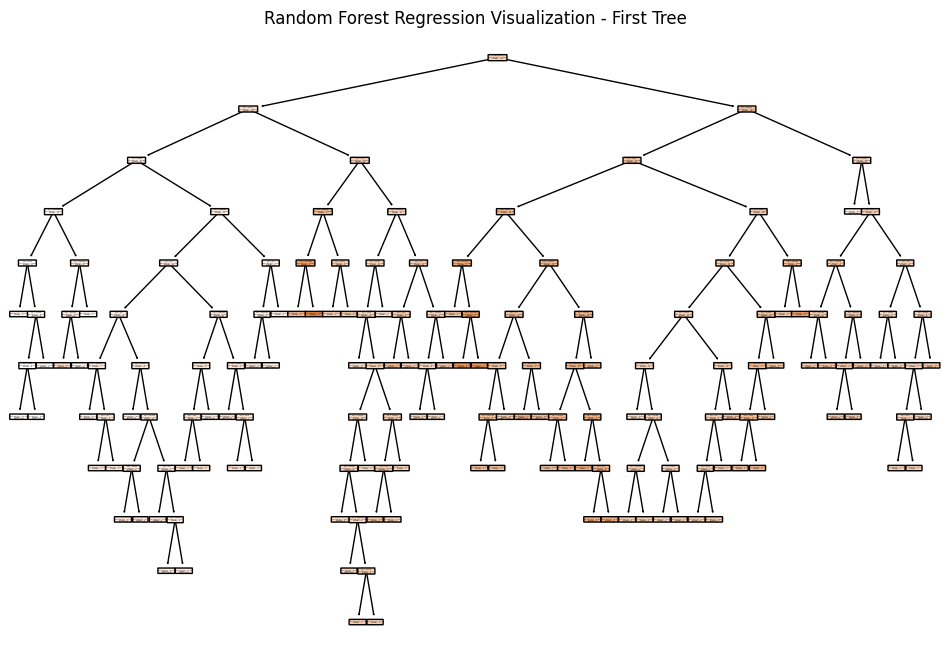

In [35]:
plt.figure(figsize=(12, 8))
plot_tree(best_model_rf.estimators_[0], filled=True, feature_names=X.columns, rounded=True)
plt.title("Random Forest Regression Visualization - First Tree")
plt.show()

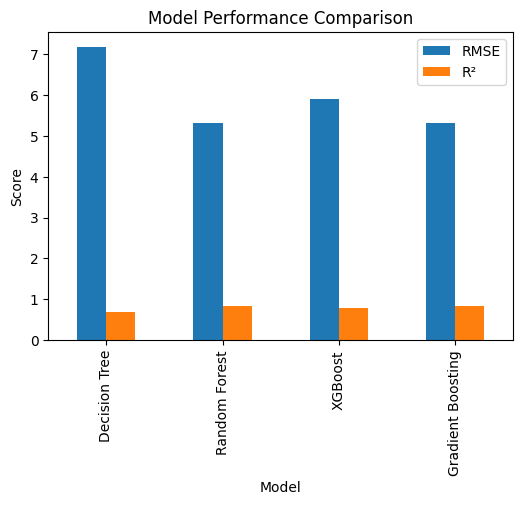

In [38]:
metrics = {
    "Decision Tree": {"RMSE": 7.19, "R²": 0.69},
    "Random Forest": {"RMSE": 5.31, "R²": 0.83},
    "XGBoost": {"RMSE": 5.91, "R²": 0.79},
    "Gradient Boosting": {"RMSE": 5.31, "R²": 0.83}, }


metrics_df = pd.DataFrame(metrics).T
metrics_df.plot(kind="bar", figsize=(6, 4))
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(["RMSE", "R²"])
plt.grid(False)
plt.show()

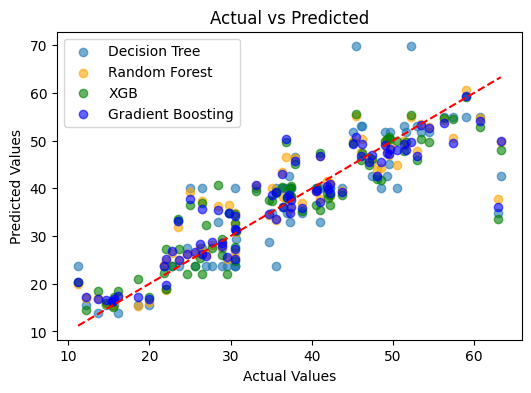

'\nThe red dashed line represents the ideal case where predicted values perfectly match actual values (\n𝑦\n=\n𝑥\ny=x).\nPoints closer to this line indicate better predictions\nIf points are scattered significantly above or below the line, the model is over- or under-predicting.\n'

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_dtr, label="Decision Tree", alpha=0.6)
plt.scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.6, color='orange')
plt.scatter(y_test, y_pred_xgb, label="XGB", alpha=0.6, color='green')
plt.scatter(y_test, y_pred_gbr, label="Gradient Boosting", alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")
plt.title("Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

'''
The red dashed line represents the ideal case where predicted values perfectly match actual values (
𝑦
=
𝑥
y=x).
Points closer to this line indicate better predictions
If points are scattered significantly above or below the line, the model is over- or under-predicting.
'''

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

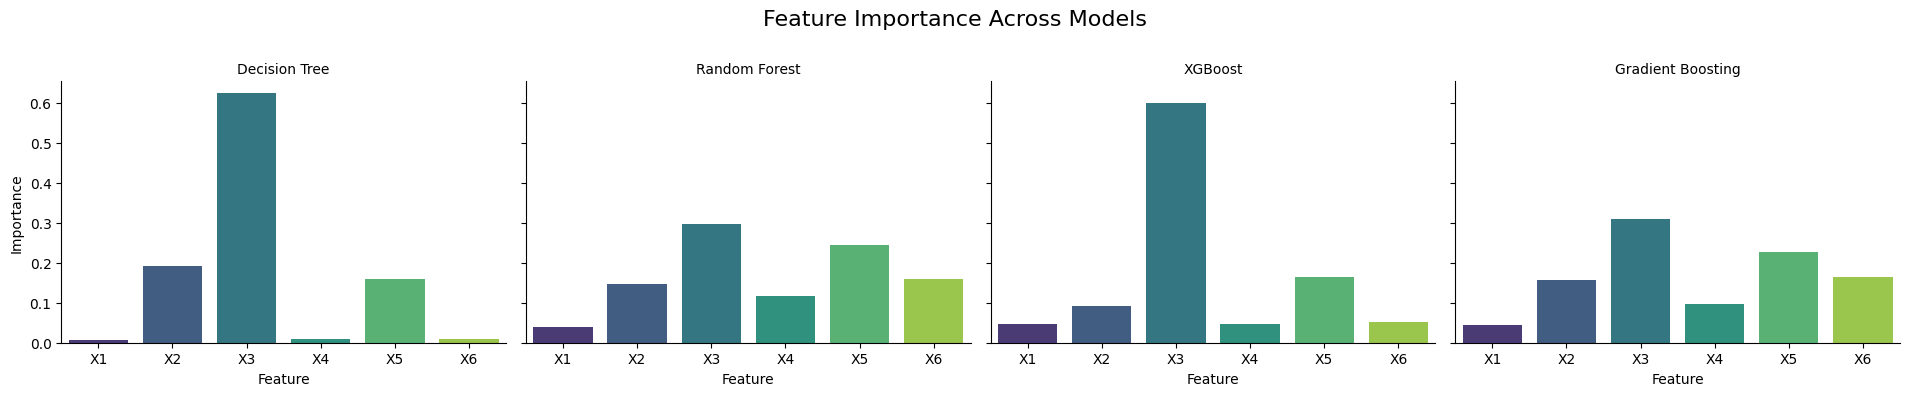

In [40]:
import matplotlib.pyplot as plt

# Get feature importance from Decision Tree Regressor
feature_importances = {
    'Decision Tree': best_model_dtr.feature_importances_,
    'Random Forest': best_model_rf.feature_importances_,
    'XGBoost': best_model_xgb.feature_importances_,
    'Gradient Boosting': best_model_gbr.feature_importances_
}
features = X.columns

importance_df = pd.DataFrame(feature_importances, index=features).reset_index()
importance_df = importance_df.melt(id_vars='index', var_name='Model', value_name='Importance')
importance_df.rename(columns={'index': 'Feature'}, inplace=True)


# Initialize FacetGrid
g = sns.FacetGrid(importance_df, col="Model", sharey=True, height=4, aspect=1.2)

# Map barplot to each model
g.map(sns.barplot, "Feature", "Importance", order=features, palette="viridis")

# Add titles and axis labels
g.set_titles("{col_name}")
g.set_axis_labels("Feature", "Importance")
g.fig.subplots_adjust(top=0.8)  # Adjust subplot spacing
g.fig.suptitle("Feature Importance Across Models", fontsize=16)  # Add a main title

# Show the plot
plt.show()


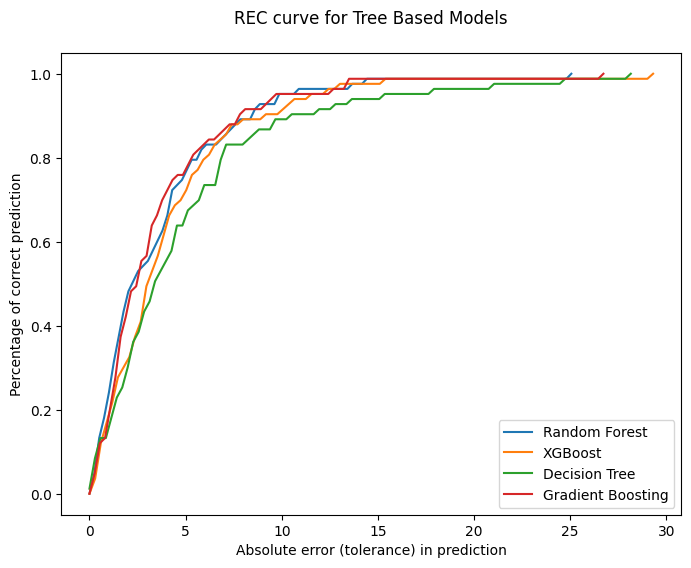

In [41]:
import numpy as np
import matplotlib.pyplot as plt


def plot_rec_curve(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    errors = np.abs(y_test - y_pred)
    sorted_errors = np.sort(errors)
    n_samples = len(sorted_errors)
    tolerance_levels = np.linspace(0, np.max(sorted_errors), num=100)
    accuracy = []
    for tolerance in tolerance_levels:
        accuracy.append(np.sum(errors <= tolerance) / n_samples)
    plt.plot(tolerance_levels, accuracy, label=model_name)

plt.figure(figsize=(8, 6))
plot_rec_curve(best_model_rf, X_test, y_test, 'Random Forest')
plot_rec_curve(best_model_xgb, X_test, y_test, 'XGBoost')
plot_rec_curve(best_model_dtr, X_test, y_test, 'Decision Tree')
plot_rec_curve(best_model_gbr, X_test, y_test, 'Gradient Boosting')
plt.title("REC curve for Tree Based Models\n")
plt.xlabel("Absolute error (tolerance) in prediction")
plt.ylabel("Percentage of correct prediction")
plt.legend(loc='lower right')
plt.show()
